# **Project 2 - Catan** #

## **Authors:** ##
1. Kuba Czech, 156035
2. Piotr Balewski, 156037

## **0.** ##

### **0.1. Basic imports** ###

In [1]:
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Video

### **0.2. Helpers functions** ###

In [5]:
if "google.colab" in str(get_ipython()):
    from google.colab.patches import cv2_imshow

    imshow = cv2_imshow
else:
    def imshow(img):
        vmin = 0
        vmax = img.max()
        if vmax > 1:
            vmax = 255
        if vmax > 1:
            img = img.astype(np.uint8)
        img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        plt.axis('off')
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
        else:
            plt.imshow(img, vmin=vmin, vmax=vmax)
        plt.show()

Single frame extraction to detect objects

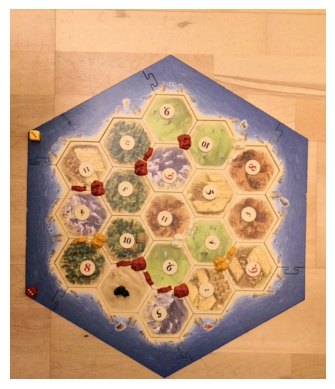

Frame extracted


In [6]:
def get_frame(path, frame_number):
    video_path = "input_data/" + path + ".mp4"
    cap = cv2.VideoCapture(video_path)

    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    ret, frame = cap.read()

    if ret:
        imshow(frame)
        print("Frame extracted")
        return frame
    else:
        print("Failed to extract frame.")
        return None

    # Release the video capture object
    cap.release()


frame = get_frame('easy1', 0)

### **0.3. Project info** ###

1. Selcted board game: Catan (previously The Settlers of Catan)

2. Short description: In Catan, players try to develop their colony as fast as possible, by building roads, villages, towns and buying development cards. Each village and town produces resources (brick, lumber, wool, grain, ore) depending on the grounds that surround them and the dice good fortune.

3. In-game items:

    a) Counters/Markers

    • Robber token: 1 piece

    • Number tokens: 18 circular tokens, each marked with numbers 2–12 (excluding 7) and dots for probability distribution.

    b) Dice

    • Standard dice: 2 six-sided dice (used to determine resource production).

    c) Cards

    • Resource cards: 95 cards divided into 5 types:

        • Brick (19)

        • Lumber (19)

        • Grain (19)

        • Ore (19)

        • Wool (19)

        • Development cards: 25 cards (including Knight, Victory Point, Monopoly, Year of Plenty, and Road Building).

    d) Boards

    • Frame (Border pieces): 6 interlocking border pieces to hold the hexagonal tiles.

    • Hexagonal terrain tiles: 19 hexes (5 types of resources: forest, hills, mountains, fields, pastures, plus 1 desert tile).

    e) Figures (Player Pieces)

    • Settlement pieces: 20 small house-shaped pieces (5 per player).

    • City pieces: 16 larger building-shaped pieces (4 per player).

    • Road pieces: 60 long rectangular pieces (15 per player).

    f) Tokens

    • Longest Road token: 1 piece (wooden or card).

    • Largest Army token: 1 piece (wooden or card).

4. Events Description:

    a) Roll the dice and read the result

    • Simply sum the numbers rolled on the two dice.

    • Hexes with the corresponding number produce resources for players with settlements or cities adjacent to those hexes.

    b) Play (reveal) a development card:

    • Knight: Move the Robber to another hex and steal one random resource card from a player with a settlement or city at one of its vertices.

    • Victory Point: Reveal this card only at the end of the game to count it toward your score.

    • Road Building: Place two road segments for free on valid spots on the board.

    • Year of Plenty: Take any two resource cards of your choice from the supply.

    • Monopoly: Announce one resource type and take all cards of that type from all other players.

    c) Building construction

    • The player pays the required resources (Brick, Lumber, Grain, Ore, or Wool) to build one of the following:

        • Road: Place a road segment connecting to your existing road network.

        • Settlement: Place a settlement at a free vertex such that all adjacent vertices are also unoccupied.

        • City: Upgrade an existing settlement to a city by paying resources, doubling its resource production.

    d) Taking a resource

    • When a number is rolled that matches the number token on a hex, all players with settlements or cities adjacent to that hex take resources from the supply based on the type of terrain (e.g., Forest gives Lumber, Hills give Brick).

    • Settlements provide one resource; cities provide two.

    • If the Robber is on the hex, no resources are produced for that hex.

    e) Starting the game

        • Players place their starting settlements and roads:

            1.	The first player places one settlement and one road.

            2.	The next players take turns in clockwise order.

            3.	The last player places two settlements and roads, then turns proceed counterclockwise back to the first player.

        • After all settlements are placed, players collect resources from the hexes adjacent to their second settlement.

    f) End of the game

    • The game ends immediately when a player reaches 10 Victory Points (VP).

    • VP can come from:

        • Settlements (1 VP each).

        • Cities (2 VP each).

        • Largest Army (2 VP for having 3+ Knights).

        • Longest Road (2 VP for the longest road of 5+ segments).

        • Victory Point development cards (1 VP per card).


### **0.4. Dataset desrciption** ###

Dataset is composed of three types of videos - easy, medium and hard ones (and each type is composed of three videos - in total 9 videos). Easy videos are those where there is very good light, camera is stable and vertically above the board. Medium video is a video where the quality is a bit worse (e. g.small shadow) and hard one is video where board is a little rotate, there is a shadow, camera shakes from time to time etc. Each video depicts some phase of game and although they may seem boring, it is a part of a game. Below, there are examples of frames from each video.

#### **Easy frames** ####

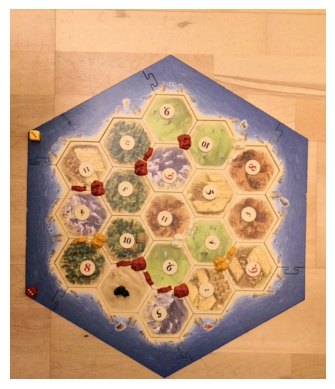

Frame extracted


In [37]:
frame = get_frame('easy1', 0)

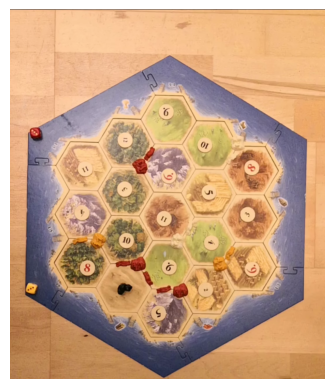

Frame extracted


In [38]:
frame = get_frame('easy2', 0)

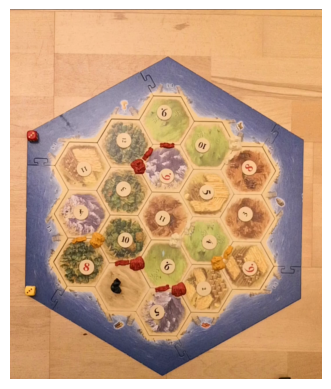

Frame extracted


In [39]:
frame = get_frame('easy3', 0)

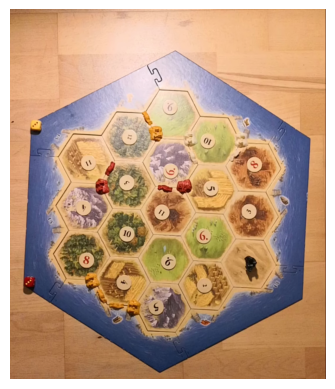

Frame extracted


In [40]:
frame = get_frame('medium1', 0)

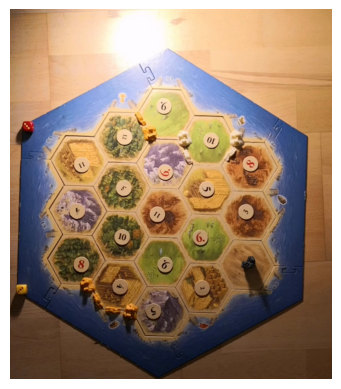

Frame extracted


In [41]:
frame = get_frame('medium2', 0)

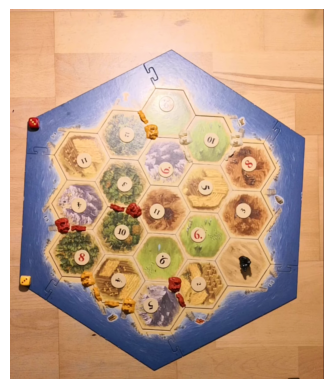

Frame extracted


In [42]:
frame = get_frame('medium3', 0)

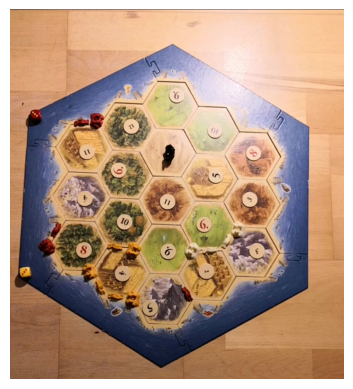

Frame extracted


In [43]:
frame = get_frame('difficult1', 0)

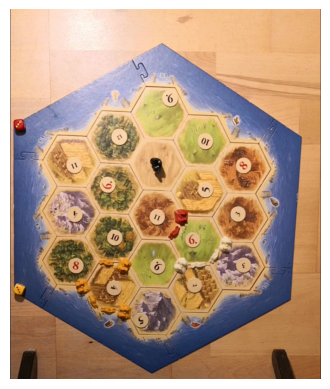

Frame extracted


In [44]:
frame = get_frame('difficult2', 0)

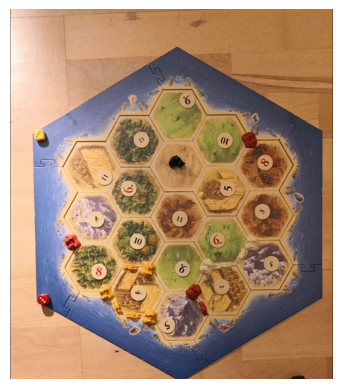

Frame extracted


In [45]:
frame = get_frame('difficult3', 0)

## **1. Object detection** ##

We decided that we would like to detect different types of objects. 

1. At first, we tried to detect settlements, but it was successfull only in case of easy videos and sometimes didn't detect all settlements. We created template of one settlement (screenshot of zoom), tested different methods and different thresholds. Our opinion was mixed, so we tried other objects
2. Then, we thought about detecting some objects that were easy to detect, while not many false positives were produced - we decided to detect tokens with numbers using openCV function Hough Circles. In this case, no matter which video was played, it detected tokens and only tokens - no false positives were produced and all tokens were detected. SUCCESS!!!
3. Third idea was to detect objects in similar manner to settlements. We created template of the thief and tried to match this template. Similarly to first point, outcome was poor so we decided to detect something else. Detecting the thief was like lottery - once it was detected perfectly when sometimes it wasn't detected at all or something else was depicted as thief
4. Final thing we wanted to detect was very obvious one - board. In all cases board was described very well (it was easy to draw a rectangle around the hexagonal board) and each time the rectangle was aligned to the boarder. SUCCESS 2!!!
5. We also thought to detect dices (related to detecting board) - partial success!!!

Because of some poor results of 1 and 3, we will present only points 2, 4 and 5

### **1.1. Number tokens detection** ###

To detect round tokens with numbers, we converted our image to grayscale, used Gaussian Blur and draw circles using HoughCircles function. In this case objects were detected easily no matter which type of video (easy, medium, hard) was played. After successful detection, it was easy to count how many circles are on the board

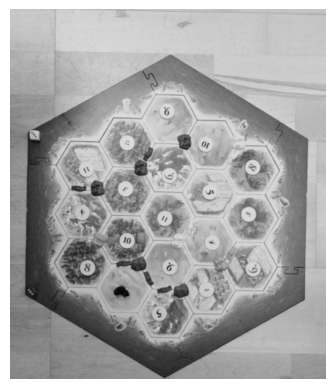

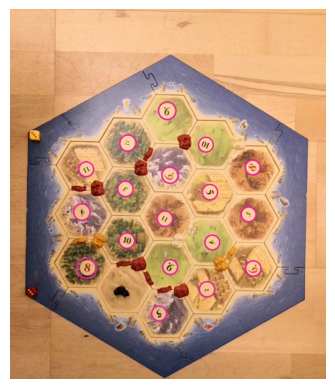

Number tokens count: 18


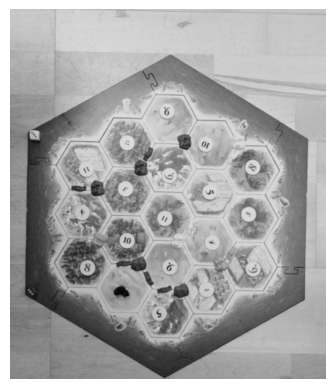

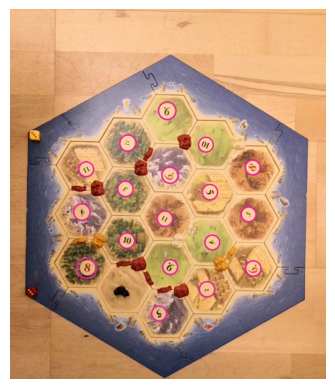

Number tokens count: 18


In [12]:
def detect_tokens(frame, path):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(frame_gray, (5, 5), 0)
    imshow(blurred)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1.2, 40, 
                            param1=10, param2=45, minRadius=20, maxRadius=35)

    img_result = frame.copy()
    if circles is not None:
        circles = np.round(circles[0,]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(img_result, (x, y), r, (160, 32, 240), 3)  # Draw circle
        
    imshow(img_result)
    file_name = 'tokens_detection_' + path + '.jpg'
    # cv2.imwrite(file_name, img_result)
    print("Number tokens count:", len(circles))

# Easy example
detect_tokens(frame, 'easy1')

# Difficult example
detect_tokens(frame, 'difficult2')

#### **Easy file** ####

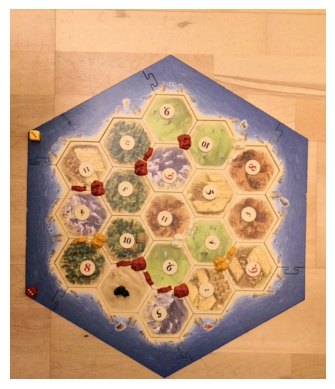

Frame extracted


In [14]:
frame = get_frame('easy1', 0)

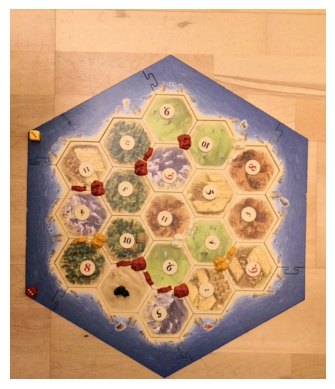

Frame extracted


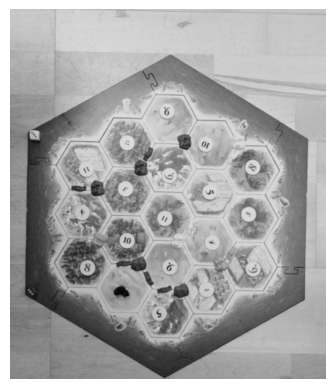

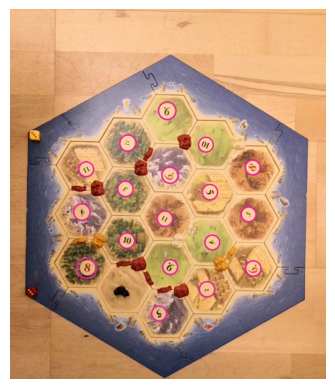

Number tokens count: 18


In [13]:
detect_tokens(frame, 'easy1')

#### **Medium file** ####

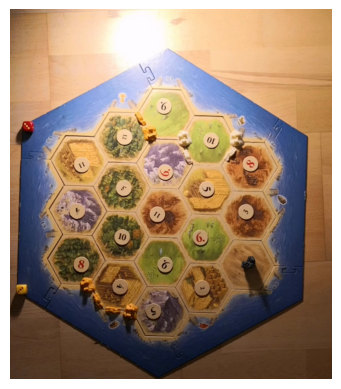

Frame extracted


In [15]:
frame = get_frame('medium2', 0)

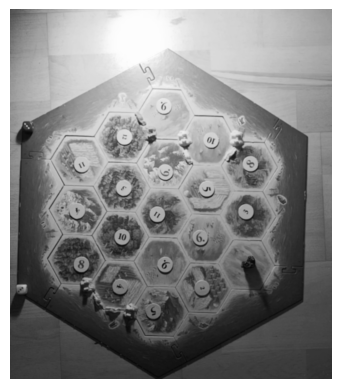

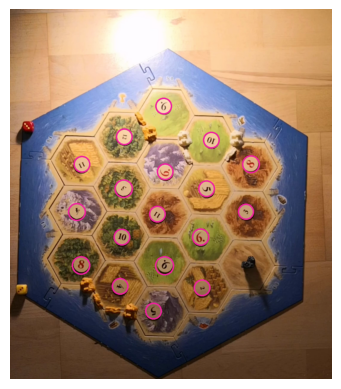

Number tokens count: 18


In [16]:
detect_tokens(frame, 'medium2')

#### **Hard file** ####

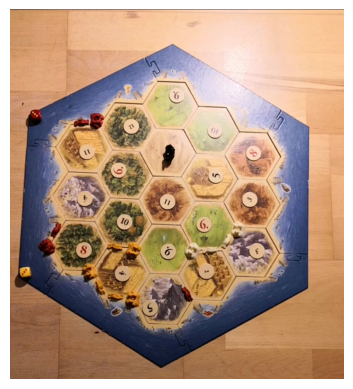

Frame extracted


In [18]:
frame = get_frame('difficult1', 0)

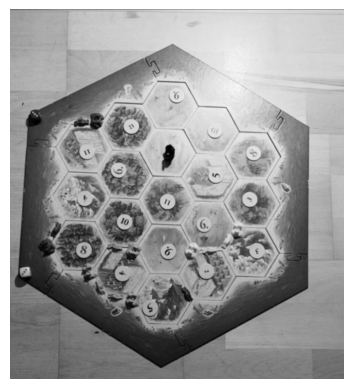

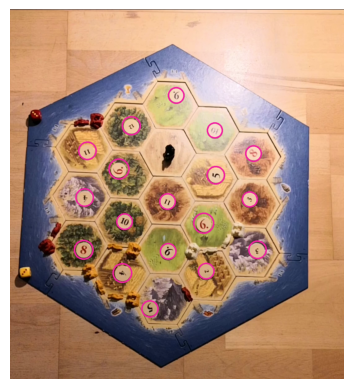

Number tokens count: 18


In [19]:
detect_tokens(frame, 'difficult1')

### **1.2. Board detection** ###

We decided to detect where is the board located (in other words where is something different than woodden floor). To achieve this, we converted frame to grayscale (2nd image), blurred it (3rd image), used canny edge detection (4th image), found extreme points (leftmost, rightmost, topmost, bottommost; 5th image) that were white and those points were used to draw the rectangle. As a bonus, we detected two corners (on the left), where the dices were located that are highlighted as red and green circles - after calculating positions of corners of the rectangle, we can detect corners geometrically (board is a regular hexagon inscribed in a rectangle; regular hexagon can be seen as 6 regular triangles and from here it is not hard to calculate positions of corners - it is sufficient to use Pythagorean Theorem). Dices were detected almost perfectly - sometimes (example 2) they were almost detected but the circle is drawn somewhere nearby

#### **Example 1 - easy** ####

In [21]:
video_path = "input_data/easy1.mp4"
cap = cv2.VideoCapture(video_path)

frame_number = 0 # 100
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()

if ret:
    cv2.imwrite("frame_100.jpg", frame)
else:
    print("Failed to extract frame.")

cap.release()

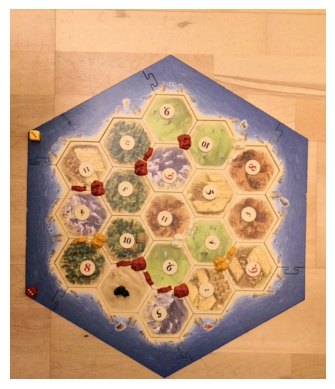

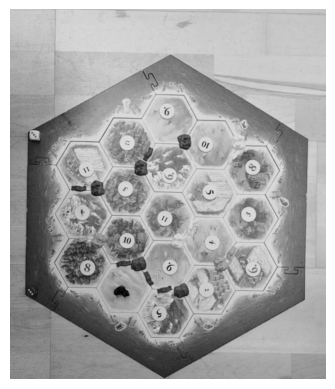

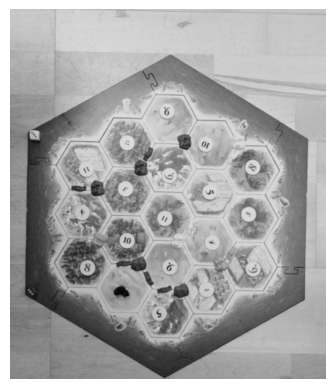

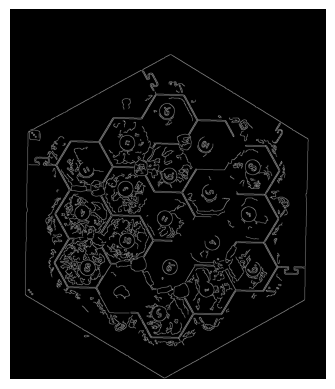

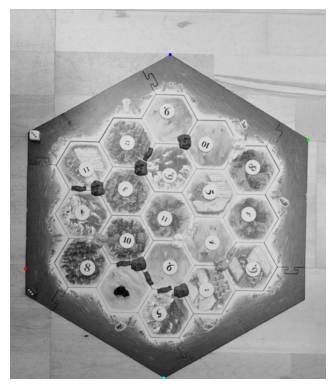

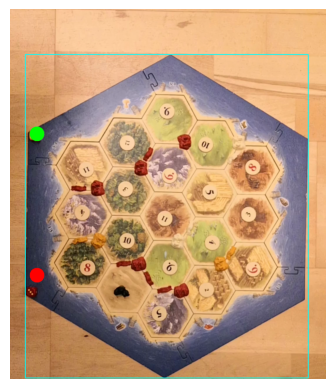

Board detected!


In [22]:
_frame = frame.copy()
imshow(_frame)
_frame = cv2.cvtColor(_frame, cv2.COLOR_BGR2GRAY)
imshow(_frame)
blurred = cv2.GaussianBlur(_frame, (5, 5), 0)
imshow(blurred)
edges = cv2.Canny(blurred, 50, 150)
edges = (edges > 0)
imshow(edges * 255)

coords = np.column_stack(np.where(edges > 0))  # Array of (y, x) coordinates

# Find extreme points
leftmost = coords[np.argmin(coords[:, 1])]   # Minimum x
rightmost = coords[np.argmax(coords[:, 1])]  # Maximum x
topmost = coords[np.argmin(coords[:, 0])]    # Minimum y
bottommost = coords[np.argmax(coords[:, 0])] # Maximum y

# Convert to (x, y) format
leftmost = (leftmost[1], leftmost[0])
rightmost = (rightmost[1], rightmost[0])
topmost = (topmost[1], topmost[0])
bottommost = (bottommost[1], bottommost[0])

# Draw the extreme points on the original image
output_image = cv2.cvtColor(_frame, cv2.COLOR_GRAY2BGR)
cv2.circle(output_image, leftmost, 5, (0, 0, 255), -1)      # Red
cv2.circle(output_image, rightmost, 5, (0, 255, 0), -1)     # Green
cv2.circle(output_image, topmost, 5, (255, 0, 0), -1)       # Blue
cv2.circle(output_image, bottommost, 5, (255, 255, 0), -1)  # Yellow
imshow(output_image)

top_left = (leftmost[0], topmost[1])         # (min_x, min_y)
bottom_right = (rightmost[0], bottommost[1]) # (max_x, max_y)

a = abs(leftmost[0] - rightmost[0])//2

pt_a = (leftmost[0] + 40, int(topmost[1] + 1.5 * a) + 30)

pt_f = (leftmost[0] + 40, topmost[1] + int(0.5 * a) + 30)

_frame = frame.copy()
cv2.rectangle(_frame, top_left, bottom_right, (255, 255, 0), 2)
cv2.circle(_frame, pt_a, 25, (0, 0, 255), -1)      # Red
cv2.circle(_frame, pt_f, 25, (0, 255, 0), -1)     # Green

imshow(_frame)
print("Board detected!")

#### **Example 2 - medium** ####

In [23]:
ideo_path = "input_data/medium2.mp4"
cap = cv2.VideoCapture(video_path)

frame_number = 0 # 100
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()

if ret:
    cv2.imwrite("frame_100.jpg", frame)
else:
    print("Failed to extract frame.")

cap.release()

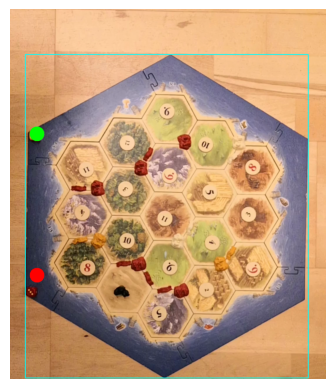

Board detected!


In [24]:
_frame = frame.copy()
_frame = cv2.cvtColor(_frame, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(_frame, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
edges = (edges > 0)

coords = np.column_stack(np.where(edges > 0))  # Array of (y, x) coordinates

# Find extreme points
leftmost = coords[np.argmin(coords[:, 1])]   # Minimum x
rightmost = coords[np.argmax(coords[:, 1])]  # Maximum x
topmost = coords[np.argmin(coords[:, 0])]    # Minimum y
bottommost = coords[np.argmax(coords[:, 0])] # Maximum y

# Convert to (x, y) format
leftmost = (leftmost[1], leftmost[0])
rightmost = (rightmost[1], rightmost[0])
topmost = (topmost[1], topmost[0])
bottommost = (bottommost[1], bottommost[0])

# Draw the extreme points on the original image
output_image = cv2.cvtColor(_frame, cv2.COLOR_GRAY2BGR)
cv2.circle(output_image, leftmost, 5, (0, 0, 255), -1)      # Red
cv2.circle(output_image, rightmost, 5, (0, 255, 0), -1)     # Green
cv2.circle(output_image, topmost, 5, (255, 0, 0), -1)       # Blue
cv2.circle(output_image, bottommost, 5, (255, 255, 0), -1)  # Yellow

top_left = (leftmost[0], topmost[1])         # (min_x, min_y)
bottom_right = (rightmost[0], bottommost[1]) # (max_x, max_y)

a = abs(leftmost[0] - rightmost[0])//2

pt_a = (leftmost[0] + 40, int(topmost[1] + 1.5 * a) + 30)

pt_f = (leftmost[0] + 40, topmost[1] + int(0.5 * a) + 30)

_frame = frame.copy()
cv2.rectangle(_frame, top_left, bottom_right, (255, 255, 0), 2)
cv2.circle(_frame, pt_a, 25, (0, 0, 255), -1)      # Red
cv2.circle(_frame, pt_f, 25, (0, 255, 0), -1)     # Green

imshow(_frame)
print("Board detected!")

### **1.3. Dices detection (by board position)** ###

In [25]:
def filter_lines_by_slope(lines, vertical_threshold=1):
    vertical_lines = []
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        dx = x2 - x1
        dy = y2 - y1
        
        # Calculate slope
        if abs(dx) < vertical_threshold:  # Vertical line
            vertical_lines.append(((x1, y1), (x2, y2)))
    
    return vertical_lines

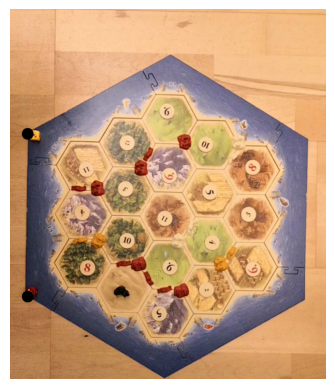

((60, 982), (60, 426))

In [26]:
def detect_dices(frame, path):
    frame_bin = np.where((frame[..., 0] < 10) | (frame[..., 1] < 10) | (frame[..., 2] > 140), 255, 0).astype(np.uint8)
    frame_bin = 255-frame_bin
    lines = cv2.HoughLinesP(frame_bin, 0.1, np.pi / 180, threshold=80, minLineLength=500, maxLineGap=10)
    vertical_lines = filter_lines_by_slope(lines)
    left_vertical_line = min(vertical_lines, key=lambda line: line[0][0])  # Min x1

    output = frame.copy()

    cv2.circle(output, (left_vertical_line[0][0], left_vertical_line[0][1]), 20, (0, 0, 0), -1)
    cv2.circle(output, (left_vertical_line[1][0], left_vertical_line[1][1]), 20, (0, 0, 0), -1)

    imshow(output)
    file_name = 'dices_detection_' + path + '.jpg'
    # cv2.imwrite(file_name, output)
    return left_vertical_line

detect_dices(frame, 'easy1')

### **1.4. Detection for all inputs** ###

In [27]:
import random

def detection(paths):
    for path in paths:
        if path != 'medium2':     # unfortunately for this input file detect dice function struggles
            frame0 = get_frame(path, 0)
            detect_dices(frame0, path)
        random_frame = get_frame(path, random.randint(0, 1500))
        detect_tokens(random_frame, path)

paths = ['easy1', 'easy2', 'easy3', 'medium1', 'medium2', 'medium3', 'difficult1', 'difficult2', 'difficult3']
# detection(paths)

## **2. Object tracking** ##

We decided that we would like to track dice (white/yellow one). To acieve this, we utilized previously written function detect_dices to find initial position of white dice and then we used MeanShifft algorithm to track it. Problem with this approach is that it did not gurantee that the dice was tracked properly throughout whole video (more about it in conclusions)

In [ ]:
catan = cv2.VideoCapture("input_data/difficult2.mp4")
if catan.isOpened():
    print("Video loaded")

catan_width = int(catan.get(3))
catan_height = int(catan.get(4))

print(catan_height, catan_width)

catan_fps = catan.get(cv2.CAP_PROP_FPS)
print(catan_fps)

Video loaded
1264 1080
29.00099787788183


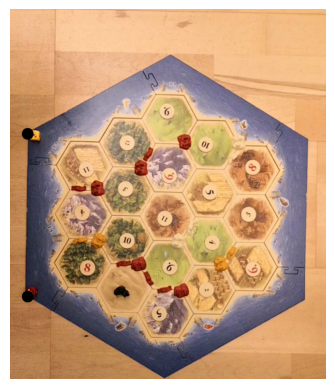

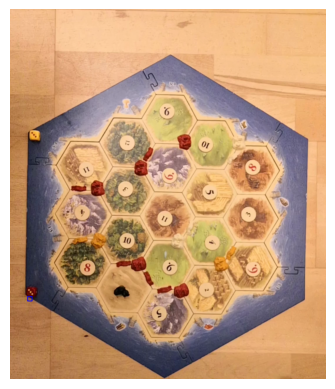

In [49]:
catan.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = catan.read()

dices = detect_dices(frame, 'easy1')
xb = dices[0][0]
yb =dices[0][1]

side_length = 15

x = int(xb)
y = int(yb)
w, h = side_length, side_length
track_window = (x, y, w, h)
cv2.rectangle(frame, (x, y), (x + w, y + h), 255, 2)
imshow(frame)

In [50]:
dice_track = cv2.VideoWriter(
    "./dice_track_meanShift.avi",
    cv2.VideoWriter_fourcc(*"DIVX"),
    catan_fps,
    (catan_width, catan_height),
)

catan.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = catan.read()

if ret:
    roi = frame[y : y + h, x : x + w]
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(
        hsv_roi, np.array((0.0, 60.0, 32.0)), np.array((180.0, 255.0, 255.0))
    )
    roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
    cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

    # Set termination criteria for MeanShift
    term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

    # Run MeanShift algorithm on subsequent frames
    f = 0
    while catan.isOpened() and f < 1200:
        ret, frame = catan.read()
        if not ret:
            break

        # Convert the frame to HSV and back project using roi_hist
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

        # Apply MeanShift to find the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        # Draw the tracking rectangle
        x, y, w, h = track_window
        dice_track.write(cv2.rectangle(frame, (x, y), (x + w, y + h), 255, 2))
        f+=1
else:
    print('Problem with ret')

dice_track.release()

In [51]:
!ffmpeg -hide_banner -loglevel error -i dice_track_meanShift.avi -y dice_track_meanShift.mp4

In [52]:
Video.from_file("./dice_track_meanShift.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...')

## **3. Conclusions** ##

After above research, we went to such conclusions:
1. Catan is nice game but probably may not have been very suitable for this project (complex structure of board, detailed elements - settlements or thief etc)

2. Videos could have been done more carefully - problem with the videos is that they should have been of better quality. Firstly, color of the floor is very similar to color of the internal part of the board, secondly light could have been stronger (whiter), we could have used different dices - here we have red and yellow but we could use two white dices instead, we also could put some tape on the boarder of this board for better detection

3. Detecting objects using templates was bad idea - it worked too poorly to show it, produced false positives, required different thresholds in each example and template that worked for 6 videos could potentially work poorly for 3 remaining ones

4. MeanShift algorithm could have been substituted by detecting an object affter every 2 or 4 frames (more expensive but could lead to better results)

5. Some operations (e. g. rolling the dice) could have been slowed down to produce better results, maybe then MeanShift would work better

6. Films could have been recorded with more FPS, but none of us is an expert in field of movie making and we don't have specialized devices for that